In [18]:
import torch as th
import numpy as np
from torch.utils.data import DataLoader, TensorDataset

from sklearn.decomposition import PCA, KernelPCA

import matplotlib.pyplot as plt

In [2]:
# Import datasets

sep_data = th.load('../datasets/sep_states1.pt')

ent_data = th.load('../datasets/ent_states1.pt')

sep_data_pair = th.stack((sep_data.real, sep_data.imag), dim=1)
ent_data_pair = th.stack((ent_data.real, ent_data.imag), dim=1)

In [3]:
sep_data.shape, sep_data_pair.shape

(torch.Size([30000, 81]), torch.Size([30000, 2, 81]))

In [4]:
full_data_real = th.cat([sep_data.real.flatten(start_dim=1), ent_data.real.flatten(start_dim=1)], dim=0).detach().numpy()
full_data_imag = th.cat([sep_data.imag.flatten(start_dim=1), ent_data.imag.flatten(start_dim=1)], dim=0).detach().numpy()

full_data_real.shape, full_data_imag.shape

((60000, 81), (60000, 81))

In [5]:
label_sep = th.zeros(sep_data.shape[0])
label_ent = th.ones(ent_data.shape[0])

labels = th.cat([label_sep, label_ent], dim=0).detach().numpy()

labels.shape, labels.dtype

((60000,), dtype('float32'))

In [6]:
dataset_real = np.concatenate([full_data_real, labels.reshape(-1, 1)], axis = 1)
dataset_imag = np.concatenate([full_data_imag, labels.reshape(-1, 1)], axis = 1)
dataset_real.shape

(60000, 82)

In [7]:
# randomly select 10000 samples

n_random_rows = 10000

random_idx = np.random.choice(dataset_real.shape[0], n_random_rows, replace=False)

subset_real = dataset_real[random_idx, :]
subset_imag = dataset_imag[random_idx, :]

subset_real[:, 81], subset_imag.shape

(array([1., 1., 1., ..., 1., 1., 1.], dtype=float32), (10000, 82))

In [8]:
pca_model = PCA(n_components=2)

pca_real = pca_model.fit_transform(subset_real[:, :-1])
pca_imag = pca_model.fit_transform(subset_imag[:, :-1])

pca_real.shape, pca_imag.shape

((10000, 2), (10000, 2))

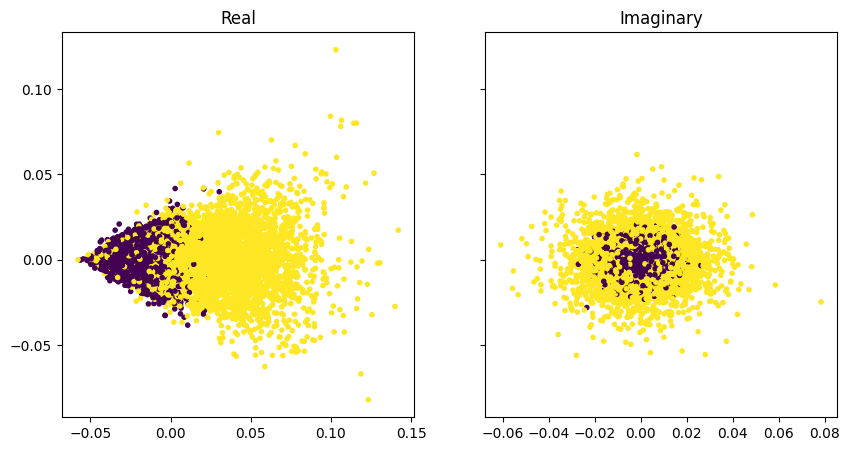

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

axs[0].scatter(pca_real[:, 0], pca_real[:, 1], c = subset_real[:, 81], marker='.')
axs[0].title.set_text('Real')
# axs[0].legend(['Separable', 'Entangled'])
axs[1].scatter(pca_imag[:, 0], pca_imag[:, 1], c = subset_imag[:, 81], marker='.')
axs[1].title.set_text('Imaginary')
# axs[1].legend(['Separable', 'Entangled'])

del fig, axs

In [10]:
rbf_pca = KernelPCA(n_components=2, kernel='rbf')

rbf_pca_real = rbf_pca.fit_transform(subset_real[:, :-1])
rbf_pca_imag = rbf_pca.fit_transform(subset_imag[:, :-1])

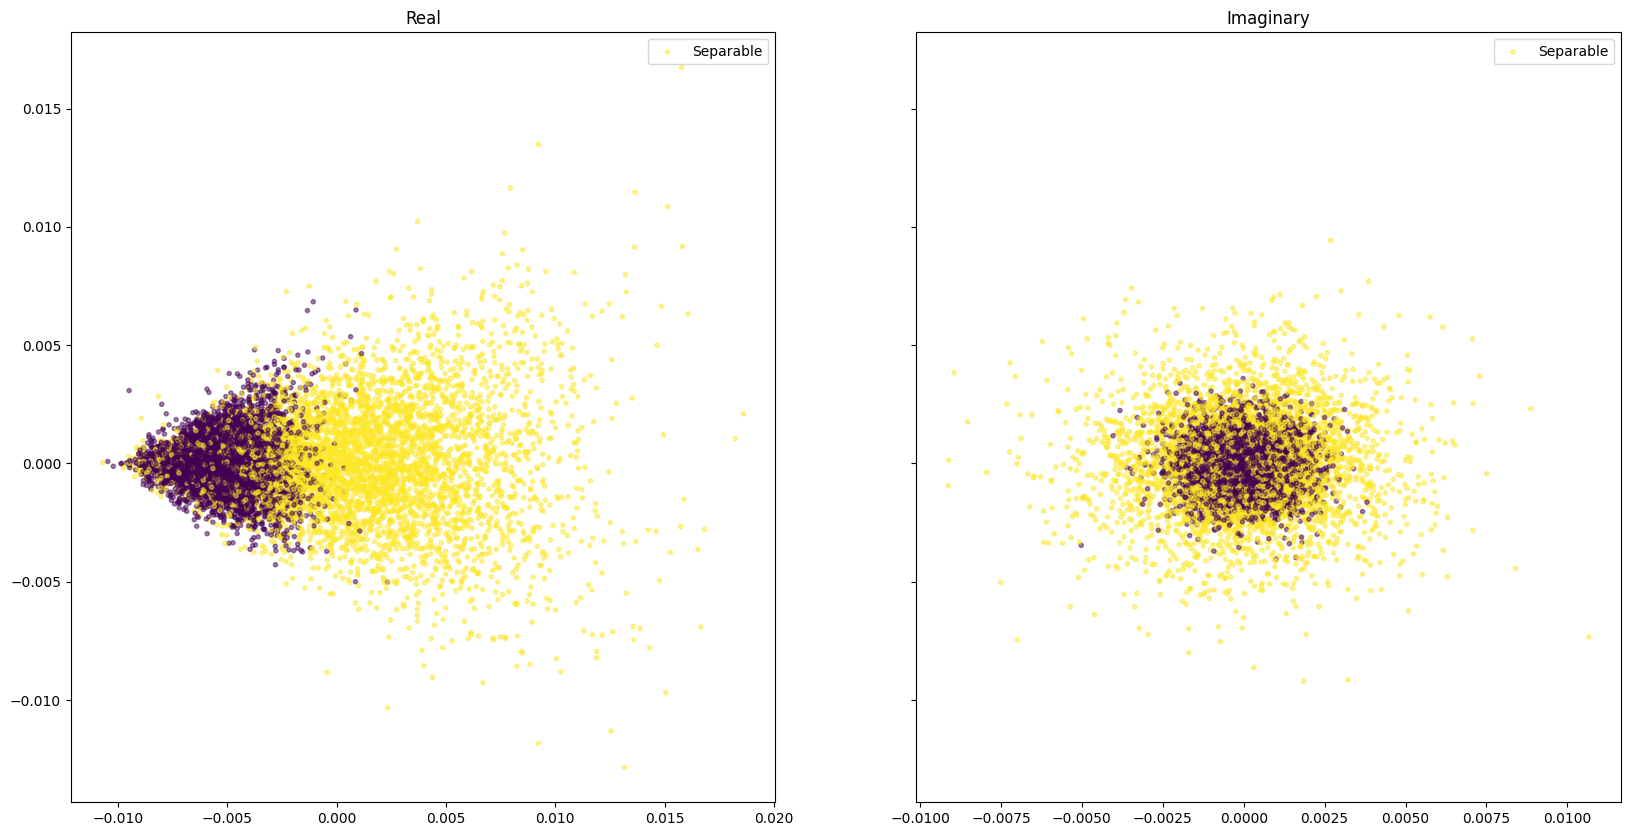

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10), sharey=True)

axs[0].scatter(rbf_pca_real[:, 0], rbf_pca_real[:, 1], c = subset_real[:, 81], marker='.', alpha=0.5)
axs[0].title.set_text('Real')
axs[0].legend(['Separable', 'Entangled'])
axs[1].scatter(rbf_pca_imag[:, 0], rbf_pca_imag[:, 1], c = subset_imag[:, 81], marker='.', alpha=0.5)
axs[1].title.set_text('Imaginary')
axs[1].legend(['Separable', 'Entangled'])